#### Campaign for selling personal loans.

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

1. Read the column description and ensure you understand each attribute well. ( 5 points)
2. Study the data distribution in each attribute, share your findings. (5 points)
3. Get the target column distribution. Your comments ( 3 points)
4. Split the data into training and test set in the ratio of 70:30 respectively (2 points)
5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (30 points)
6. Print the confusion matrix, classification report, and accuracy for all the above models (8 points)
7. Give your reasoning on which is the best model in this case and why it performs better? (7 points)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report


In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
del df["ID"]

### 1. Read the column description and ensure you understand each attribute well. ( 5 points)

In [3]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.columns #Get all the columsn list

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [6]:
df.shape

(5000, 13)

In [7]:
df.describe() # 5 Summary Factor for better analysis

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### 2. Study the data distribution in each attribute, share your findings. (5 points)

In [8]:
df_5Summary = df.dropna().describe()
df_5Summary

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
df["Family"].value_counts(normalize = True)

1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64

In [10]:
df_Education = df.Education.replace({1: "Undergrad",2:"Graduate",3:"Advanced/Professional"})
df_Education.value_counts(normalize = True)

Undergrad                0.4192
Advanced/Professional    0.3002
Graduate                 0.2806
Name: Education, dtype: float64

In [11]:
df.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


Descirption:
1. This data contains Age group of people which makes 68% between 35 to 55
2. Undergraduates make upto 42% of the population
3. We can see some strong relation between 
        1.Income vs CCAvg(Avg Credit Card Spending)
        2.Income vs Mortgage
        3.Income vs Personal Loan
        4.Personal Loan vs CCAvg(Avg Credit Card Spending)

### 3. Get the target column distribution. Your comments ( 3 points)

[Text(0, 0.5, 'Income'), Text(0.5, 0, 'Age Group')]

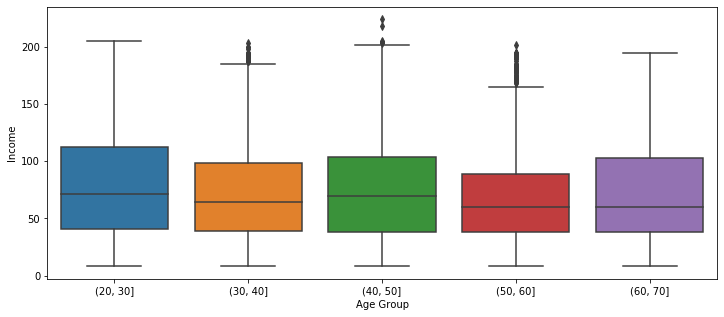

In [12]:
df["AgeGroup"] = pd.cut(df.Age, [20,30,40,50,60,70]) # Create Age Strata based on these cut points
plt.figure(figsize=(12,5)) # set the plot size bigger than the default for better viaulization - 12cm wide and 5cm tall
sns.boxplot(x="AgeGroup", y ="Income", data = df).set(xlabel="Age Group", ylabel = "Income") # Box Plot

#### Desciption: 
The above plot shows the income distribution on the Age Strata

Text(0.5, 1.0, 'Histogram of the Income')

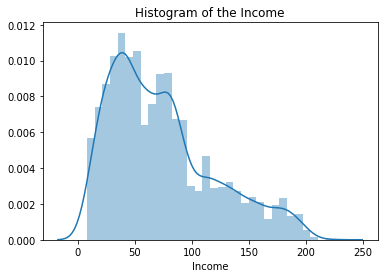

In [13]:
sns.distplot(df["Income"].dropna()).set_title('Histogram of the Income')

Text(0.5, 1.0, 'Histogram of the Cred Score Average')

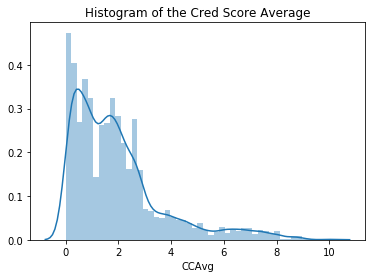

In [14]:
sns.distplot(df["CCAvg"].dropna()).set_title('Histogram of the Cred Score Average')

Description: 
1. histogram shows that this Income is right skewed. we will compare Income along with the Mortgage side by side on histogram to analyze how much motage a person has based on the salary he earns as show below.
2. CCAvg Histogram also show that its right skewed

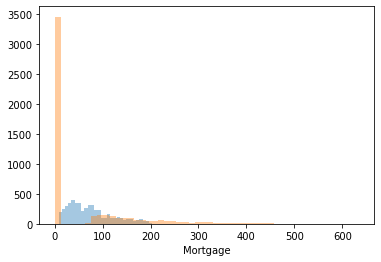

In [15]:
sns.distplot(df.Income.dropna(), kde = False)
sns.distplot(df.Mortgage.dropna(), kde = False)

based on the above plot we will have to scrutinize the income vs mortgage as there is huge mortgage with lesser salaried people 

[Text(0, 0.5, 'CCAvg'), Text(0.5, 0, 'Income Group')]

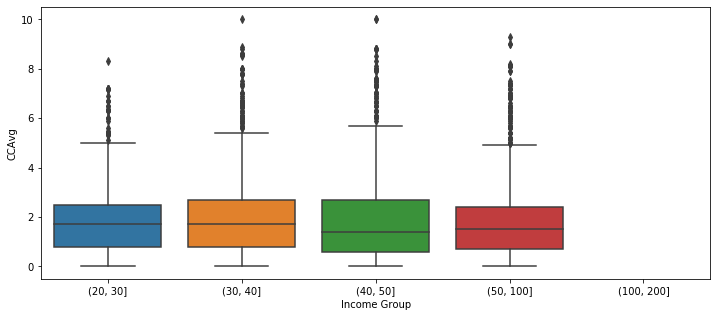

In [16]:
df["IncomeGroup"] = pd.cut(df.Age, [20,30,40,50,100,200]) # Create Age Strata based on these cut points
plt.figure(figsize=(12,5)) # set the plot size bigger than the default for better viaulization - 12cm wide and 5cm tall
sns.boxplot(x="IncomeGroup", y ="CCAvg", data = df).set(xlabel="Income Group", ylabel = "CCAvg") # Box Plot

[Text(0, 0.5, 'CCAvg'), Text(0.5, 0, 'Personal Loan')]

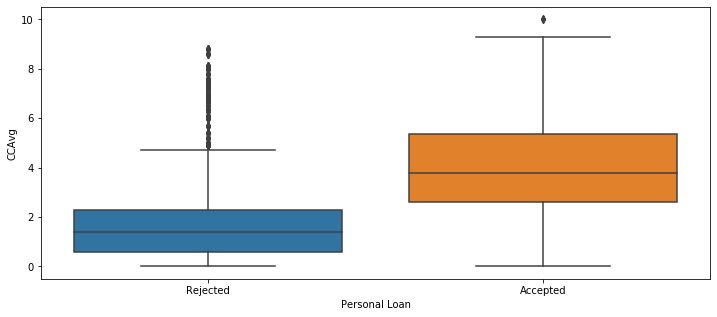

In [17]:
df["PersonalLoanCategory"] = df["Personal Loan"].replace({1: "Accepted", 0:"Rejected"})
df["IncomeGroup"] = pd.cut(df.Age, [20,30,40,50,100,200]) # Create Age Strata based on these cut points
plt.figure(figsize=(12,5)) # set the plot size bigger than the default for better viaulization - 12cm wide and 5cm tall
sns.boxplot(x="PersonalLoanCategory", y ="CCAvg", data = df).set(xlabel="Personal Loan", ylabel = "CCAvg") # Box Plot

Description:
1. Based on the above box plot it seems like people who spend more on credit card has the tendency 
to accept the Personal Loan  
2. On the Rejected Personal Loan there is quite a few outliers which shows that people with more cread card spends
have rejected the Personal loan  

Based on the Analysis done there seems to be 4 strong co-relation for 
    1. Income vs CCAvg(Avg Credit Card Spending)
    2. Income vs Mortgage
    3. Income vs Personal Loan
    4. Personal Loan vs CCAvg(Avg Credit Card Spending)
We will put this on a scatter plot to analyse more

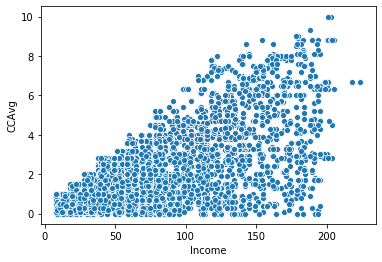

In [18]:
sns.scatterplot(x=df['Income'], y=df['CCAvg']);

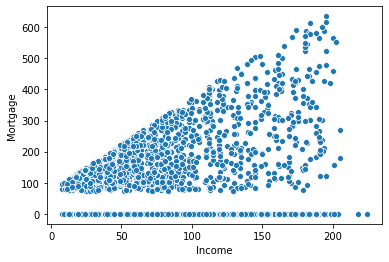

In [19]:
sns.scatterplot(x=df['Income'], y=df['Mortgage']);

Based on the Above 2 Scatter plot we can say that as the Income Increases the Mortgage and Credit Card spend increases but
this doesnot say whether both are increasing simultaneously

### 4. Split the data into training and test set in the ratio of 70:30 respectively (2 points)

In [20]:
y = df["Personal Loan"]

In [21]:
print(df.shape)
df = df.drop(["Personal Loan","PersonalLoanCategory","AgeGroup","IncomeGroup"], axis=1)
print(df.shape)

(5000, 16)
(5000, 12)


In [22]:
df = df.dropna()
X = df

In [23]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [24]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 12)
(1500, 12)
(3500,)
(1500,)


### 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (30 points)

### 6. Print the confusion matrix, classification report, and accuracy for all the above models (8 points)

#### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
#instantiate the model
logreg = LogisticRegression() 

In [26]:
#fit the model
logreg.fit(x_train,y_train)

C:\Users\Ganesha_Rog\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_pred=logreg.predict(x_test)

In [28]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.94


In [29]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cnf_matrix)

Confusion Matrix: [[1347   20]
 [  70   63]]


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1367
           1       0.76      0.47      0.58       133

    accuracy                           0.94      1500
   macro avg       0.85      0.73      0.78      1500
weighted avg       0.93      0.94      0.93      1500



#### K-NN

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn = KNeighborsClassifier(n_neighbors=12)

In [48]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [49]:
y_pred = knn.predict(x_test)

In [50]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9046666666666666


In [36]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1347,   20],
       [ 118,   15]], dtype=int64)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1367
           1       0.43      0.11      0.18       133

    accuracy                           0.91      1500
   macro avg       0.67      0.55      0.56      1500
weighted avg       0.88      0.91      0.88      1500



#### Naïve Bayes

In [38]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [39]:
#Create a Gaussian Classifier
gnb = GaussianNB()

In [40]:
# Train the model using the training sets
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
#Predict the response for test dataset
y_pred = gnb.predict(x_test)

In [42]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9046666666666666


In [43]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1274,   93],
       [  50,   83]], dtype=int64)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1367
           1       0.47      0.62      0.54       133

    accuracy                           0.90      1500
   macro avg       0.72      0.78      0.74      1500
weighted avg       0.92      0.90      0.91      1500



### 7. Give your reasoning on which is the best model in this case and why it performs better? (7 points)

Logistic regression has provided better result when looked at the model which predicts 94% time correct for 
the Personal Loan Buyers.